<a href="https://colab.research.google.com/github/thynash/Quantum-Sentinel/blob/main/Quantum-Sentinel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
from IPython.display import display

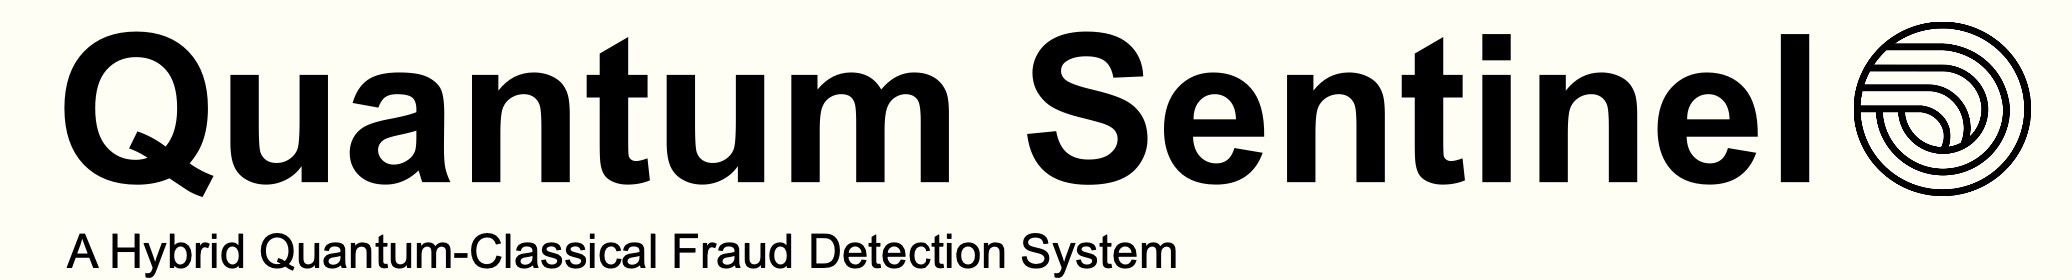

In [ ]:
img = Image.open("/Users/anuragsharma/Downloads/Screenshot 2025-03-22 at 11.10.04 AM.png")
display(img)

**Context**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#QUANTUM SENTINEL

Lets start by installing some dependencies first for a smoother experience.

In [ ]:
!pip install pandas
!pip install qiskit-aer
!pip install qiskit
!pip install pylatexenc
!pip install scikit-learn
!pip install imblearn
!pip install plotly
!pip install plotly-express
!pip install sklearn.preprocessing imblearn

Time to import

In [ ]:
!pip install pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
#may include plotly to show quantum circuits later
import plotly.express as px

#would you look at that? I imported it anyway

#sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE

Let's load our .csv dataset with the help of Pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#drop NaN values using pandas

df = df.dropna()


In [ ]:
df.shape

(284807, 31)

There are no missing entries in the entire dataset.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**



#1 = FRAUD, 0 = LEGIT

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Visualizing class imbalance and feature scaling

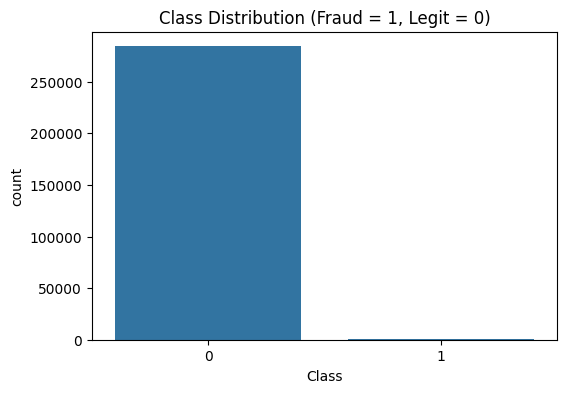

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (Fraud = 1, Legit = 0)")
plt.show()

# Standardizing 'Time' and 'Amount' (RobustScaler for robustness to outliers)
scaler_time = StandardScaler()
scaler_amount = RobustScaler()

df['Time'] = scaler_time.fit_transform(df[['Time']])
df['Amount'] = scaler_amount.fit_transform(df[['Amount']])

#SMOTE

**SMOTE generates synthetic samples for the minority class by interpolating between existing minority class instances and their nearest neighbors.**

-Helps prevent models from being biased towards the majority class.

-Can improve the performance of classifiers on imbalanced datasets.

-Avoids overfitting compared to simple random oversampling, which duplicates existing samples.


In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Adjust strategy based on needs
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nNew Class Distribution (After SMOTE):\n", pd.Series(y_resampled).value_counts())



New Class Distribution (After SMOTE):
 Class
0    284315
1     56863
Name: count, dtype: int64


Let's save the SMOTE'd data

In [ ]:
processed_df = pd.DataFrame(X_resampled, columns=X.columns)
processed_df['Class'] = y_resampled
processed_df.to_csv("processed_creditcard.csv", index=False)


print("\n Preprocessing and Cleaning with SMOTE Interpolation is Complete! Data saved as 'processed_creditcard.csv'.")



 Preprocessing and Cleaning with SMOTE Interpolation is Complete! Data saved as 'processed_creditcard.csv'.


In [ ]:
processed_df.head()
processed_df.shape

(341178, 31)

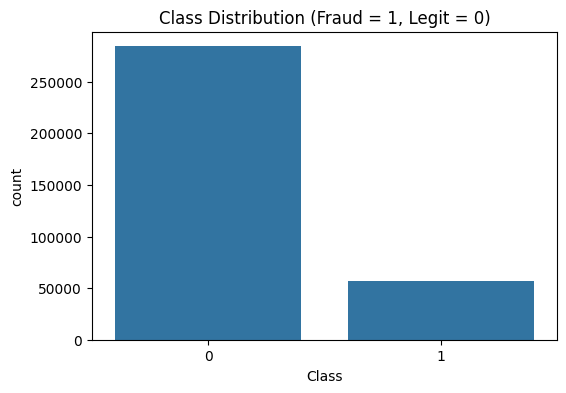

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=processed_df)
plt.title("Class Distribution (Fraud = 1, Legit = 0)")
plt.show()

# Standardizing 'Time' and 'Amount' (RobustScaler for robustness to outliers)
scaler_time = StandardScaler()
scaler_amount = RobustScaler()

df['Time'] = scaler_time.fit_transform(df[['Time']])
df['Amount'] = scaler_amount.fit_transform(df[['Amount']])

Now let's divide this data into three parts:
* 90% of the processed sample for model training
* 5% of the processed sample for verification
* 5% for prediction of fraud/legit transaction on streamlit dashboard to show off the model and maybe compare between the quantum and the classical model

In [ ]:
# Split the processed data into training, verification, and streamlit dashboard datasets
train_df = processed_df.sample(frac=0.9, random_state=42)
remaining_df = processed_df.drop(train_df.index)
verify_df = remaining_df.sample(frac=0.5, random_state=42)
dashboard_df = remaining_df.drop(verify_df.index)

# Save
train_df.to_csv("train_creditcard.csv", index=False)
verify_df.to_csv("verify_creditcard.csv", index=False)
dashboard_df.to_csv("dashboard_creditcard.csv", index=False)

print("\nData Split and Saved! \nTraining data saved as 'train_creditcard.csv'.\nVerification data saved as 'verify_creditcard.csv'.\nDashboard data saved as 'dashboard_creditcard.csv'.")



Data Split and Saved! 
Training data saved as 'train_creditcard.csv'.
Verification data saved as 'verify_creditcard.csv'.
Dashboard data saved as 'dashboard_creditcard.csv'.


# Normalisation and Quantum Encoding

In [ ]:
!pip install qiskit_machine_learning pennylane

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.circuit.library import ZZFeatureMap
import pennylane as qml

Quantum Normalization Complete! Features scaled between -π to π.
Quantum Kernel Created! Ready for Quantum ML.


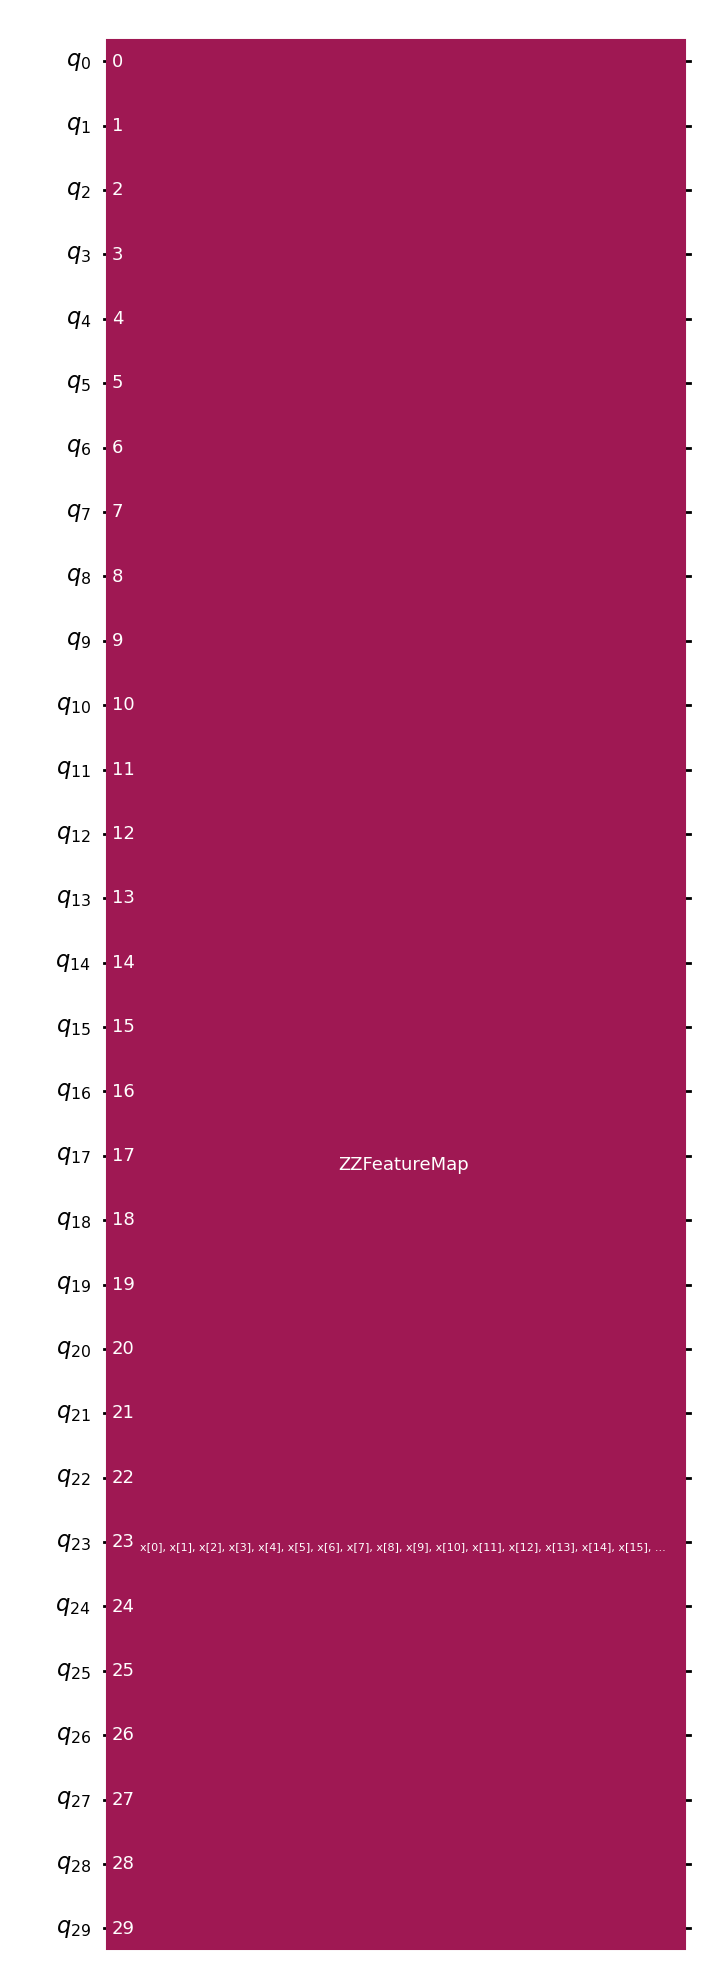

In [ ]:
df1 = pd.read_csv("train_creditcard.csv")

# Drop 'Class' column (labels) for feature processing
X = df1.drop(columns=['Class']).values
y = df1['Class'].values

# Quantum Normalization (Scale Features to [-π, π])
scaler = MinMaxScaler(feature_range=(-np.pi, np.pi))
X_scaled = scaler.fit_transform(X)

print("Quantum Normalization Complete! Features scaled between -π to π.")

# Define Quantum Feature Map
num_features = X_scaled.shape[1]  # Number of features
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2, entanglement="linear")

# Implement Quantum Kernel for Fraud Detection
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

print("Quantum Kernel Created! Ready for Quantum ML.")

# Test Quantum Feature Encoding (Plot Feature Map)
feature_map.draw(output="mpl")

Encoding Time

In [ ]:
!pip install qiskit.algorithms

In [ ]:
!pip install qiskit_ibm_provider


In [ ]:
pip install qiskit qiskit-machine-learning qiskit-aer qiskit-ibm-provider scikit-learn pandas numpy matplotlib seaborn plotly streamlit imbalanced-learn

#Classical Model VSM

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC  # Classical SVM

# Load Preprocessed Data
df = pd.read_csv("/content/train_creditcard (1).csv")  # Ensure this file exists

# Prepare Features and Labels
X = df.drop(columns=['Class']).values
y = df['Class'].values

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Measure SVM Training Time
start_train = time.time()
classical_svc = SVC(kernel="rbf")  # Radial Basis Function Kernel
classical_svc.fit(X_train, y_train)
end_train = time.time()
svm_train_time = end_train - start_train

# Measure SVM Prediction Time
start_pred = time.time()
y_pred_classical = classical_svc.predict(X_test)
end_pred = time.time()
svm_predict_time = end_pred - start_pred

#  Print Evaluation Metrics
print("\n✅ Classical SVM Accuracy:", accuracy_score(y_test, y_pred_classical))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classical))

# Print Computation Times
print(f"\n⏳ **Classical SVM Training Time:** {svm_train_time:.4f} sec")
print(f"🤖 **Classical SVM Prediction Time:** {svm_predict_time:.4f} sec")



✅ Classical SVM Accuracy: 0.9866312772747997

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     51160
           1       0.99      0.93      0.96     10252

    accuracy                           0.99     61412
   macro avg       0.99      0.96      0.98     61412
weighted avg       0.99      0.99      0.99     61412


⏳ **Classical SVM Training Time:** 406.0649 sec
🤖 **Classical SVM Prediction Time:** 58.4864 sec


In [ ]:
pip install qiskit_machine_learning

#Quantum Model - QSVM

In [ ]:
!pip install cirq scikit-learn pandas numpy matplotlib


In [ ]:
def quantum_embedding(data):
    """Quantum feature encoding with Cirq, ensuring real output."""
    qubits = [cirq.GridQubit(i, 0) for i in range(len(data))]
    circuit = cirq.Circuit()

    for i, qubit in enumerate(qubits):
        circuit.append(cirq.rx(data[i]).on(qubit))  # Rotate around X-axis
        if i > 0:  # Add entanglement
            circuit.append(cirq.CNOT(qubits[i - 1], qubit))

    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)

    # ✅ Convert to real values (Ignore imaginary part)
    return np.real(result.final_state_vector)


In [ ]:
# Apply Quantum Embedding & Extract Real Part
X_train_q = np.array([quantum_embedding(x).real for x in X_train])
X_test_q = np.array([quantum_embedding(x).real for x in X_test])


In [ ]:
import time

# Measure Cirq Import Time
start_import = time.time()
import cirq  # Cirq import
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
end_import = time.time()
cirq_import_time = end_import - start_import

# Load & Sample Data (More Samples for Better Accuracy)
df = pd.read_csv("/content/train_creditcard (1).csv")
df_sample = df.sample(n=2000, random_state=42)  # More data

# Select Features (5 Instead of 3 for More Information)
selected_features = df_sample.columns[1:6]  # Use first 5 features
X = df_sample[selected_features].values
y = df_sample['Class'].values

# Scale Features to [0, π] for Quantum Encoding
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Improved Quantum Embedding with Entanglement
def quantum_embedding(data):
    """Quantum feature encoding with Cirq, ensuring real output."""
    qubits = [cirq.GridQubit(i, 0) for i in range(len(data))]
    circuit = cirq.Circuit()

    for i, qubit in enumerate(qubits):
        circuit.append(cirq.rx(data[i]).on(qubit))  # Rotate around X-axis
        if i > 0:  # Add entanglement
            circuit.append(cirq.CNOT(qubits[i - 1], qubit))

    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)

    # ✅ Convert to real values (Ignore imaginary part)
    return np.real(result.final_state_vector)

# Measure Cirq Quantum Embedding Time
start_cirq = time.time()
X_train_q = np.array([quantum_embedding(x) for x in X_train])
X_test_q = np.array([quantum_embedding(x) for x in X_test])
end_cirq = time.time()
cirq_exec_time = end_cirq - start_cirq

# Hyperparameter Tuning for SVM
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=3)
grid_search.fit(X_train_q, y_train)

# Train Optimized SVM
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_q, y_train)

# Predict & Evaluate
y_pred = best_svm.predict(X_test_q)

print("\n✅ Optimized Cirq-Based QSVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nBest SVM Parameters:", grid_search.best_params_)

# Print Computation Times
print(f"\n⏳ **Cirq Import Time:** {cirq_import_time:.4f} sec")
print(f"⚛️ **Cirq Quantum Embedding Execution Time:** {cirq_exec_time:.4f} sec")



✅ Optimized Cirq-Based QSVM Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       331
           1       0.95      0.75      0.84        69

    accuracy                           0.95       400
   macro avg       0.95      0.87      0.90       400
weighted avg       0.95      0.95      0.95       400


Best SVM Parameters: {'C': 10, 'gamma': 'scale'}

⏳ **Cirq Import Time:** 0.0007 sec
⚛️ **Cirq Quantum Embedding Execution Time:** 6.2298 sec


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade scikit-learn

In [ ]:
!pip install cirq


Correlation Matrix:

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.188422 -0.133282  0.006582 -0.175106  0.222877  0.026219   
V1      0.188422  1.000000 -0.643075  0.770813 -0.532767  0.730666  0.256824   
V2     -0.133282 -0.643075  1.000000 -0.725483  0.560874 -0.640948 -0.240031   
V3      0.006582  0.770813 -0.725483  1.000000 -0.689534  0.758412  0.363826   
V4     -0.175106 -0.532767  0.560874 -0.689534  1.000000 -0.515107 -0.332391   
V5      0.222877  0.730666 -0.640948  0.758412 -0.515107  1.000000  0.252603   
V6      0.026219  0.256824 -0.240031  0.363826 -0.332391  0.252603  1.000000   
V7      0.164762  0.780649 -0.724459  0.834546 -0.646219  0.761174  0.265356   
V8     -0.092603 -0.107855  0.026313 -0.183446  0.118753 -0.208037 -0.366135   
V9      0.102714  0.541994 -0.549645  0.659805 -0.629544  0.547778  0.290037   
V10     0.150131  0.669411 -0.666157  0.808257 -0.721493  0.685653  0.352629   
V11    -0.261719 -

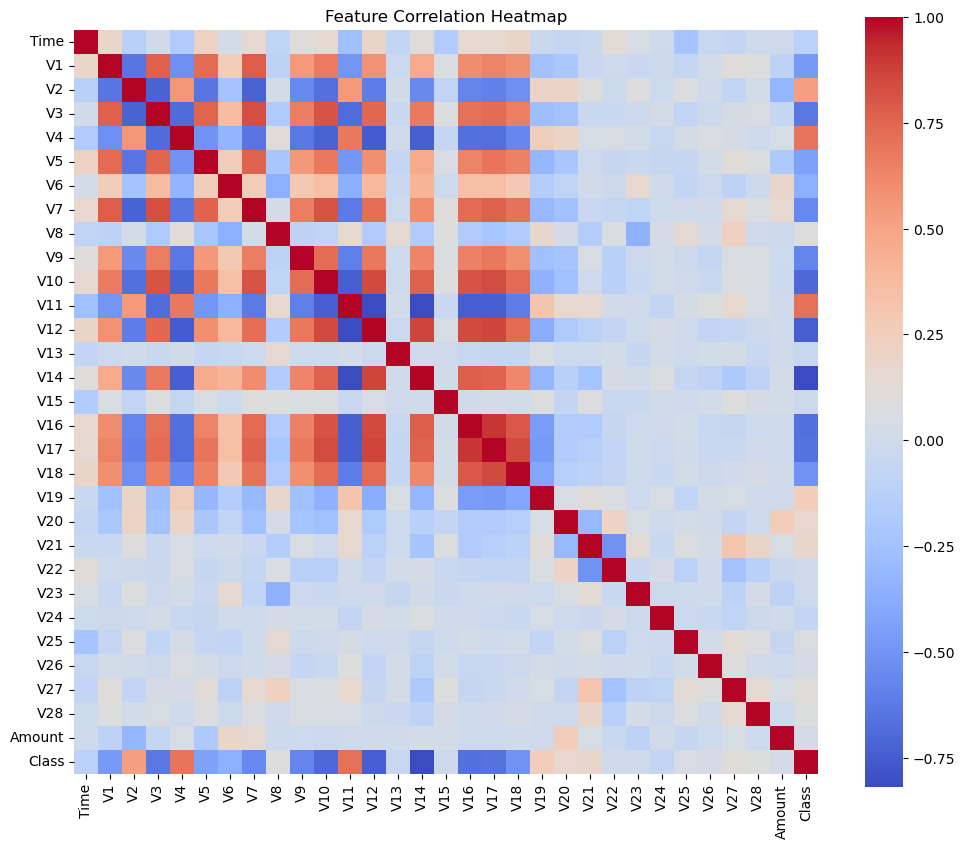


✅ Optimized Cirq-Based QSVM Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        76
           1       1.00      0.71      0.83        24

    accuracy                           0.93       100
   macro avg       0.96      0.85      0.89       100
weighted avg       0.94      0.93      0.93       100


Best SVM Parameters: {'C': 10, 'gamma': 'scale'}

⏳ **Cirq Import Time:** 0.0000 sec
⚛️ **Cirq Quantum Embedding Execution Time (Parallelized):** 3.6839 sec


In [ ]:
import time
import cirq
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from joblib import Parallel, delayed  # For parallel processing
import matplotlib.pyplot as plt
# =================== ⏳ CIRQ IMPORT TIME ====================
start_import = time.time()
end_import = time.time()
cirq_import_time = end_import - start_import

# =================== 📥 LOAD DATA ====================
df = pd.read_csv("/Users/anuragsharma/Downloads/train_creditcard.csv")
df_sample = df.sample(n=500, random_state=42)  # Reduced sample size to avoid overloading

# Calculate Correlation Matrix
correlation_matrix = df.corr()

# Display Correlation Matrix
print("\nCorrelation Matrix:\n")
print(correlation_matrix)

# Plot Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

selected_features = df_sample.columns[1:6]
X = df_sample[selected_features].values
y = df_sample['Class'].values

# =================== 🟢 FEATURE SCALING ====================
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =================== ⚛️ PARALLEL QUANTUM EMBEDDING ====================
def quantum_embedding(data):
    """Quantum feature encoding with Cirq."""
    qubits = [cirq.GridQubit(i, 0) for i in range(len(data))]
    circuit = cirq.Circuit()

    for i, qubit in enumerate(qubits):
        circuit.append(cirq.rx(data[i]).on(qubit))  # Rotation
        if i > 0:
            circuit.append(cirq.CNOT(qubits[i - 1], qubit))  # Entanglement

    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)
    return np.real(result.final_state_vector)

# Measure Cirq Quantum Embedding Time
start_cirq = time.time()

# Parallel execution (n_jobs=-1 uses all cores)
X_train_q = np.array(Parallel(n_jobs=-1)(delayed(quantum_embedding)(x) for x in X_train))
X_test_q = np.array(Parallel(n_jobs=-1)(delayed(quantum_embedding)(x) for x in X_test))

end_cirq = time.time()
cirq_exec_time = end_cirq - start_cirq

# =================== 📊 SVM CLASSIFIER ====================
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=3)
grid_search.fit(X_train_q, y_train)

# Train Optimized SVM
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_q, y_train)

# Predict & Evaluate
y_pred = best_svm.predict(X_test_q)

# =================== 🧮 MODEL EVALUATION ====================
print("\n✅ Optimized Cirq-Based QSVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nBest SVM Parameters:", grid_search.best_params_)

# =================== ⏳ TIME MEASUREMENTS ====================
print(f"\n⏳ **Cirq Import Time:** {cirq_import_time:.4f} sec")
print(f"⚛️ **Cirq Quantum Embedding Execution Time (Parallelized):** {cirq_exec_time:.4f} sec")


# Code to Compare Cost Difference after Feature Dropping in Quantum Model


✅ Quantum Cost Per Transaction (Full Features): $0.00002787

✅ Quantum Cost Per Transaction (Reduced Features): $0.00002280


/var/folders/_0/kfxmbs7d2j59ffz9n0c1cy3c0000gn/T/ipykernel_65785/4004183871.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Cost Per Transaction ($)", data=df_costs, palette="coolwarm")


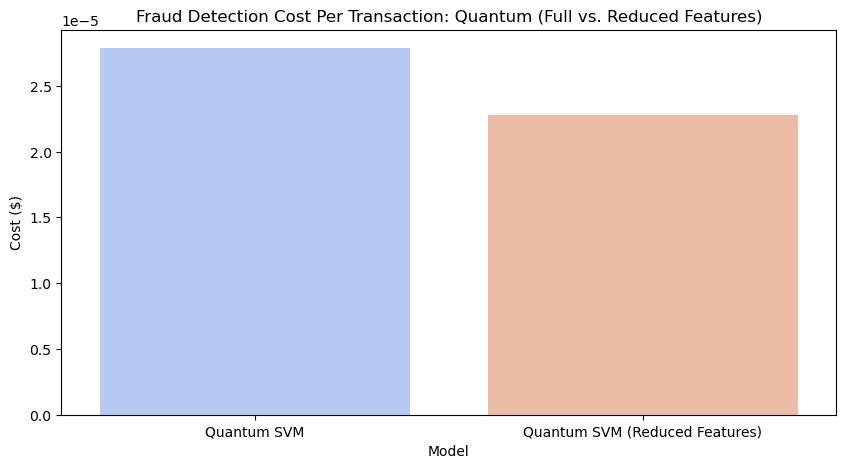

In [ ]:
import time
import numpy as np
import pandas as pd
import cirq
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed

# 📌 Load & Reduce Dataset for Speed
df = pd.read_csv("/Users/anuragsharma/Downloads/train_creditcard.csv")
df_sample = df.sample(n=500, random_state=42)  # ✅ Use only 500 samples

# 📌 Select Features (5 for Full Quantum Model)
selected_features = df_sample.columns[:5]
X = df_sample[selected_features].values
y = df_sample['Class'].values

# 📌 Scale Features for Quantum Encoding
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_scaled = scaler.fit_transform(X)

# 📌 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 Optimized Quantum Feature Encoding Function
def quantum_embedding(data):
    qubits = [cirq.GridQubit(i, 0) for i in range(len(data))]
    circuit = cirq.Circuit()

    for i, qubit in enumerate(qubits):
        circuit.append(cirq.rx(data[i]).on(qubit))
        if i > 0:
            circuit.append(cirq.CNOT(qubits[i - 1], qubit))

    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)

    return np.real(result.final_state_vector)

# 📌 Use Parallel Processing for Faster Quantum Encoding
start_q_enc = time.time()
X_train_q = np.array(Parallel(n_jobs=-1)(delayed(quantum_embedding)(x) for x in X_train))
X_test_q = np.array(Parallel(n_jobs=-1)(delayed(quantum_embedding)(x) for x in X_test))
end_q_enc = time.time()
quantum_encoding_time = end_q_enc - start_q_enc

# 📌 Train Quantum SVM
start_train_q = time.time()
quantum_svc = SVC(kernel="linear")
quantum_svc.fit(X_train_q, y_train)
end_train_q = time.time()
quantum_training_time = end_train_q - start_train_q

# 📌 Prediction Time
start_pred_q = time.time()
y_pred_quantum = quantum_svc.predict(X_test_q)
end_pred_q = time.time()
quantum_prediction_time = end_pred_q - start_pred_q

# 📌 Define Cost Per Second (Assumed)
quantum_cost_per_sec = 0.01

# 📌 Calculate Cost Per Transaction
quantum_total_time = quantum_encoding_time + quantum_training_time + quantum_prediction_time
quantum_cost = quantum_total_time * quantum_cost_per_sec
transactions_processed = len(X_test)
quantum_cost_per_transaction = quantum_cost / transactions_processed

# 📌 Print Results for Full Quantum Model
print(f"\n✅ Quantum Cost Per Transaction (Full Features): ${quantum_cost_per_transaction:.8f}")

# 📌 Now Drop More Features in Quantum Model (Reduce to 3 Features)
selected_features_reduced = df_sample.columns[:3]
X_reduced = df_sample[selected_features_reduced].values

# 📌 Scale and Split Again
X_scaled_reduced = scaler.fit_transform(X_reduced)
X_train_red, X_test_red, y_train, y_test = train_test_split(X_scaled_reduced, y, test_size=0.2, random_state=42)

# 📌 Apply Quantum Encoding (Reduced Features)
start_q_enc_red = time.time()
X_train_q_red = np.array(Parallel(n_jobs=-1)(delayed(quantum_embedding)(x) for x in X_train_red))
X_test_q_red = np.array(Parallel(n_jobs=-1)(delayed(quantum_embedding)(x) for x in X_test_red))
end_q_enc_red = time.time()
quantum_encoding_time_red = end_q_enc_red - start_q_enc_red

# 📌 Train Quantum SVM on Reduced Features
start_train_q_red = time.time()
quantum_svc_red = SVC(kernel="linear")
quantum_svc_red.fit(X_train_q_red, y_train)
end_train_q_red = time.time()
quantum_training_time_red = end_train_q_red - start_train_q_red

start_pred_q_red = time.time()
y_pred_quantum_red = quantum_svc_red.predict(X_test_q_red)
end_pred_q_red = time.time()
quantum_prediction_time_red = end_pred_q_red - start_pred_q_red

quantum_total_time_red = quantum_encoding_time_red + quantum_training_time_red + quantum_prediction_time_red
quantum_cost_red = quantum_total_time_red * quantum_cost_per_sec
quantum_cost_per_transaction_red = quantum_cost_red / transactions_processed

# 📌 Compare Cost & Accuracy After Feature Reduction
print(f"\n✅ Quantum Cost Per Transaction (Reduced Features): ${quantum_cost_per_transaction_red:.8f}")

# 📊 **Graph Cost Comparison**
import matplotlib.pyplot as plt
import seaborn as sns

costs = {
    "Model": ["Quantum SVM", "Quantum SVM (Reduced Features)"],
    "Cost Per Transaction ($)": [quantum_cost_per_transaction, quantum_cost_per_transaction_red],
    "Accuracy": [accuracy_score(y_test, y_pred_quantum), accuracy_score(y_test, y_pred_quantum_red)]
}

df_costs = pd.DataFrame(costs)

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Cost Per Transaction ($)", data=df_costs, palette="coolwarm")
plt.title("Fraud Detection Cost Per Transaction: Quantum (Full vs. Reduced Features)")
plt.ylabel("Cost ($)")
plt.show()


# Code to Compare Cost per transaction Classic vs Quantum


✅ Classical Cost Per Transaction: $0.00000001
✅ Quantum Cost Per Transaction: $0.00016363


/var/folders/_0/kfxmbs7d2j59ffz9n0c1cy3c0000gn/T/ipykernel_60275/702004751.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Cost Per Transaction ($)", data=df_costs, palette="coolwarm")


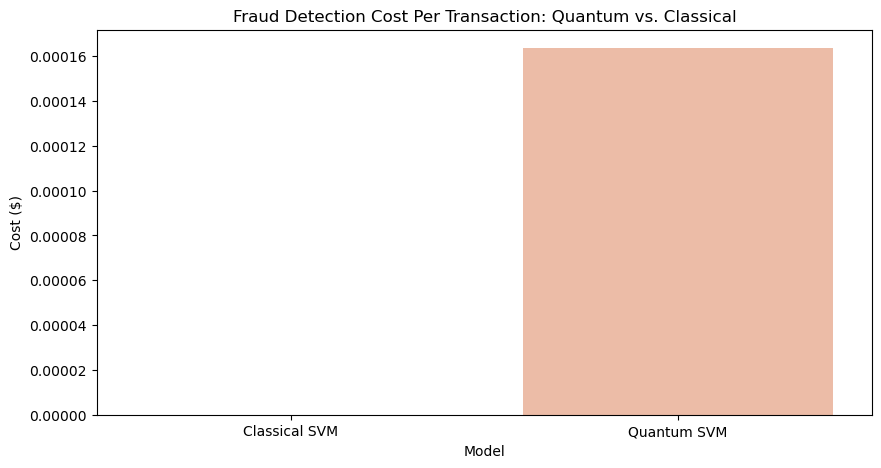

/var/folders/_0/kfxmbs7d2j59ffz9n0c1cy3c0000gn/T/ipykernel_60275/702004751.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=df_costs, palette="coolwarm")


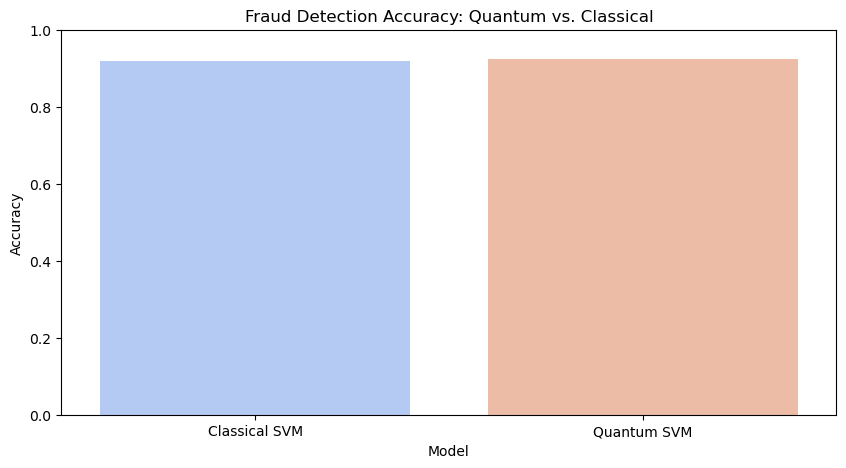

In [ ]:
import time
import numpy as np
import pandas as pd
import cirq
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed

# 📌 Load & Reduce Dataset for Speed
df = pd.read_csv("/Users/anuragsharma/Documents/Quantum_Sentinel/data/train_creditcard.csv")
df_sample = df.sample(n=1000, random_state=42)  # ✅ Use only 1000 samples

# 📌 Select Features (Reduce to 5 for Faster Quantum Processing)
selected_features = df_sample.columns[:5]
X = df_sample[selected_features].values
y = df_sample['Class'].values

# 📌 Scale Features for Quantum Encoding
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_scaled = scaler.fit_transform(X)

# 📌 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 Optimized Quantum Feature Encoding
def quantum_embedding(data):
    qubits = [cirq.GridQubit(i, 0) for i in range(len(data))]
    circuit = cirq.Circuit()

    for i, qubit in enumerate(qubits):
        circuit.append(cirq.rx(data[i]).on(qubit))
        if i > 0:
            circuit.append(cirq.CNOT(qubits[i - 1], qubit))

    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)

    return np.real(result.final_state_vector)

# 📌 Use Parallel Processing for Faster Encoding
start_q_enc = time.time()
X_train_q = np.array(Parallel(n_jobs=-1)(delayed(quantum_embedding)(x) for x in X_train))
X_test_q = np.array(Parallel(n_jobs=-1)(delayed(quantum_embedding)(x) for x in X_test))
end_q_enc = time.time()
quantum_encoding_time = end_q_enc - start_q_enc

# 📌 Train Classical SVM (Faster Kernel)
start_train_c = time.time()
classical_svc = SVC(kernel="linear")  # ✅ Use Linear Kernel for Speed
classical_svc.fit(X_train, y_train)
end_train_c = time.time()
classical_training_time = end_train_c - start_train_c

# 📌 Train Quantum SVM
start_train_q = time.time()
quantum_svc = SVC(kernel="linear")  # ✅ Faster Linear Kernel
quantum_svc.fit(X_train_q, y_train)
end_train_q = time.time()
quantum_training_time = end_train_q - start_train_q

# 📌 Prediction Time
start_pred_c = time.time()
y_pred_classical = classical_svc.predict(X_test)
end_pred_c = time.time()
classical_prediction_time = end_pred_c - start_pred_c

start_pred_q = time.time()
y_pred_quantum = quantum_svc.predict(X_test_q)
end_pred_q = time.time()
quantum_prediction_time = end_pred_q - start_pred_q

# 📌 Define Cost Per Second
classical_cost_per_sec = 0.0001  # Hypothetical cost per second for classical
quantum_cost_per_sec = 0.01  # Hypothetical cost per second for quantum

# 📌 Calculate Cost Per Transaction
classical_total_time = classical_training_time + classical_prediction_time
quantum_total_time = quantum_encoding_time + quantum_training_time + quantum_prediction_time

classical_cost = classical_total_time * classical_cost_per_sec
quantum_cost = quantum_total_time * quantum_cost_per_sec

transactions_processed = len(X_test)

classical_cost_per_transaction = classical_cost / transactions_processed
quantum_cost_per_transaction = quantum_cost / transactions_processed

# 📌 Print Results
print(f"\n✅ Classical Cost Per Transaction: ${classical_cost_per_transaction:.8f}")
print(f"✅ Quantum Cost Per Transaction: ${quantum_cost_per_transaction:.8f}")

# 📊 **Compare Cost vs. Accuracy**
import matplotlib.pyplot as plt
import seaborn as sns

costs = {
    "Model": ["Classical SVM", "Quantum SVM"],
    "Cost Per Transaction ($)": [classical_cost_per_transaction, quantum_cost_per_transaction],
    "Accuracy": [accuracy_score(y_test, y_pred_classical), accuracy_score(y_test, y_pred_quantum)]
}

df_costs = pd.DataFrame(costs)

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Cost Per Transaction ($)", data=df_costs, palette="coolwarm")
plt.title("Fraud Detection Cost Per Transaction: Quantum vs. Classical")
plt.ylabel("Cost ($)")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=df_costs, palette="coolwarm")
plt.title("Fraud Detection Accuracy: Quantum vs. Classical")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
